In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [2]:
# Load data
df = pd.read_csv('../datasets/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-20,172.050003,174.259995,171.419998,171.850006,167.085480,33930500
1,2018-02-21,172.830002,174.119995,171.009995,171.070007,166.327103,37471600
2,2018-02-22,171.800003,173.949997,171.710007,172.500000,167.717453,30991900
3,2018-02-23,173.669998,175.649994,173.539993,175.500000,170.634277,33812400
4,2018-02-26,176.350006,179.389999,176.210007,178.970001,174.008057,38162200


In [3]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df['Date'])

## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [4]:
df.set_index('Date', inplace=True)

In [5]:
df.sort_index(inplace=True)

## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,172.050003,174.259995,171.419998,171.850006,167.085480,33930500
2018-02-21,172.830002,174.119995,171.009995,171.070007,166.327103,37471600
2018-02-22,171.800003,173.949997,171.710007,172.500000,167.717453,30991900
2018-02-23,173.669998,175.649994,173.539993,175.500000,170.634277,33812400
2018-02-26,176.350006,179.389999,176.210007,178.970001,174.008057,38162200


## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `df['2018']` in the cell below:

In [7]:
df['2018']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,172.050003,174.259995,171.419998,171.850006,167.085480,33930500
2018-02-21,172.830002,174.119995,171.009995,171.070007,166.327103,37471600
2018-02-22,171.800003,173.949997,171.710007,172.500000,167.717453,30991900
2018-02-23,173.669998,175.649994,173.539993,175.500000,170.634277,33812400
2018-02-26,176.350006,179.389999,176.210007,178.970001,174.008057,38162200
...,...,...,...,...,...,...
2018-12-24,148.149994,151.550003,146.589996,146.830002,144.314041,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,154.476852,58582500
2018-12-27,155.839996,156.770004,150.070007,156.149994,153.474335,53117100


You can also filter by month:

In [8]:
df['2019-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,155.214005,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.753540,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.719513,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.395203,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,148.166870,41025300
2019-01-09,151.289993,154.529999,149.630005,153.309998,150.682983,45099100
2019-01-10,152.500000,153.970001,150.860001,153.800003,151.164627,35780700
2019-01-11,152.880005,153.699997,151.509995,152.289993,149.680466,27023200
2019-01-14,150.850006,151.270004,149.220001,150.000000,147.429718,32439200


## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [9]:
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-28,175.008573,176.924282,174.300001,175.200001,170.342599,3.586840e+07
2018-03-31,175.047143,176.799524,173.061430,174.496192,169.658301,3.398703e+07
2018-04-30,169.765238,171.657618,168.292382,169.834287,165.125647,3.172163e+07
2018-05-31,184.956365,186.469091,183.862273,185.536818,180.840478,2.822620e+07
2018-06-30,188.720477,189.831906,187.419047,188.621429,184.099089,2.512498e+07
2018-07-31,190.196190,191.540000,189.014760,190.311429,185.748575,1.874721e+07
2018-08-31,212.486957,214.561304,211.305652,213.346089,208.745572,3.044865e+07
2018-09-30,222.331053,224.530526,220.077895,222.073685,217.509478,3.573537e+07
2018-10-31,221.200001,223.940871,217.874347,220.845652,216.306680,3.433689e+07


In [10]:
df.resample('W').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-25,172.587502,174.494995,171.919998,172.730003,167.941078,34051600
2018-03-04,177.210001,179.313998,175.506003,177.338000,172.421320,40425680
2018-03-11,176.300003,177.792001,175.476004,177.088000,172.178259,27970540
2018-03-18,180.069998,181.154001,178.590002,179.360000,174.387256,31083500
2018-03-25,173.198001,174.391998,170.680002,171.120004,166.375717,34534140
...,...,...,...,...,...,...
2020-01-19,314.010004,316.916003,311.991998,314.989996,314.244202,32602780
2020-01-26,318.485001,320.474991,316.619995,317.952507,317.199699,28980325
2020-02-02,317.716004,320.957996,313.098004,316.872003,316.121747,43336740


## Lookup challenge
---

Where can you find all the resample options?

## Rolling
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of methods for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` method with a statistical function chained to it. 

In [11]:
df.rolling(3).mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-22,172.226669,174.109996,171.380000,171.806671,167.043345,3.413133e+07
2018-02-23,172.766668,174.573329,172.086665,173.023336,168.226278,3.409197e+07
2018-02-26,173.940002,176.329997,173.820002,175.656667,170.786596,3.432217e+07
...,...,...,...,...,...,...
2020-02-10,319.706665,323.389994,317.370005,322.263326,322.006663,2.770487e+07
2020-02-11,320.049998,322.949992,316.853332,320.396657,320.396657,2.677967e+07
2020-02-12,319.750000,324.223328,318.009999,322.786662,322.786662,2.645020e+07


## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

/Users/rileydallas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


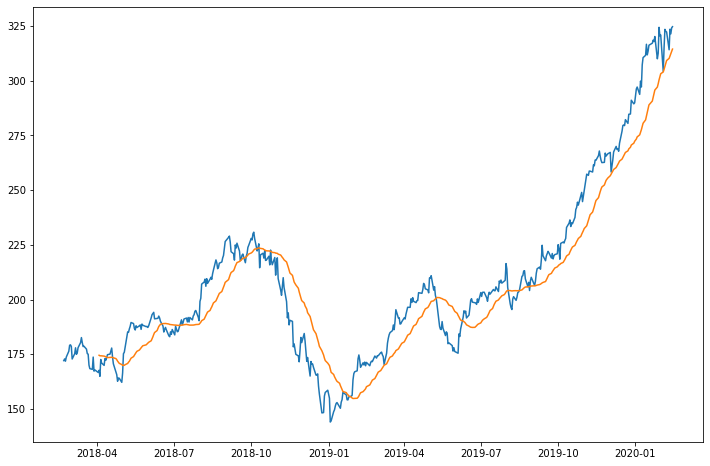

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df['Open'])
plt.plot(df['Open'].rolling(30).mean())

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,172.050003,174.259995,171.419998,171.850006,167.085480,33930500
2018-02-21,172.830002,174.119995,171.009995,171.070007,166.327103,37471600
2018-02-22,171.800003,173.949997,171.710007,172.500000,167.717453,30991900
2018-02-23,173.669998,175.649994,173.539993,175.500000,170.634277,33812400
2018-02-26,176.350006,179.389999,176.210007,178.970001,174.008057,38162200


In [14]:
df.diff()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,0.779999,-0.140000,-0.410003,-0.779999,-0.758377,3541100.0
2018-02-22,-1.029999,-0.169998,0.700012,1.429993,1.390350,-6479700.0
2018-02-23,1.869995,1.699997,1.829986,3.000000,2.916824,2820500.0
2018-02-26,2.680008,3.740005,2.670014,3.470001,3.373780,4349800.0
...,...,...,...,...,...,...
2020-02-10,-8.190002,-1.850006,-4.149994,1.519989,1.519989,-2083800.0
2020-02-11,9.420013,2.350006,4.859985,-1.940003,-1.940003,-3756400.0
2020-02-12,-2.130005,3.320007,2.760010,7.590027,7.590027,4851800.0


## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,172.050003,174.259995,171.419998,171.850006,167.085480,33930500
2018-02-21,172.830002,174.119995,171.009995,171.070007,166.327103,37471600
2018-02-22,171.800003,173.949997,171.710007,172.500000,167.717453,30991900
2018-02-23,173.669998,175.649994,173.539993,175.500000,170.634277,33812400
2018-02-26,176.350006,179.389999,176.210007,178.970001,174.008057,38162200


In [16]:
df.pct_change().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,0.004534,-0.000803,-0.002392,-0.004539,-0.004539,0.104363
2018-02-22,-0.005960,-0.000976,0.004093,0.008359,0.008359,-0.172923
2018-02-23,0.010885,0.009773,0.010657,0.017391,0.017391,0.091008
2018-02-26,0.015432,0.021292,0.015386,0.019772,0.019772,0.128645


## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff?

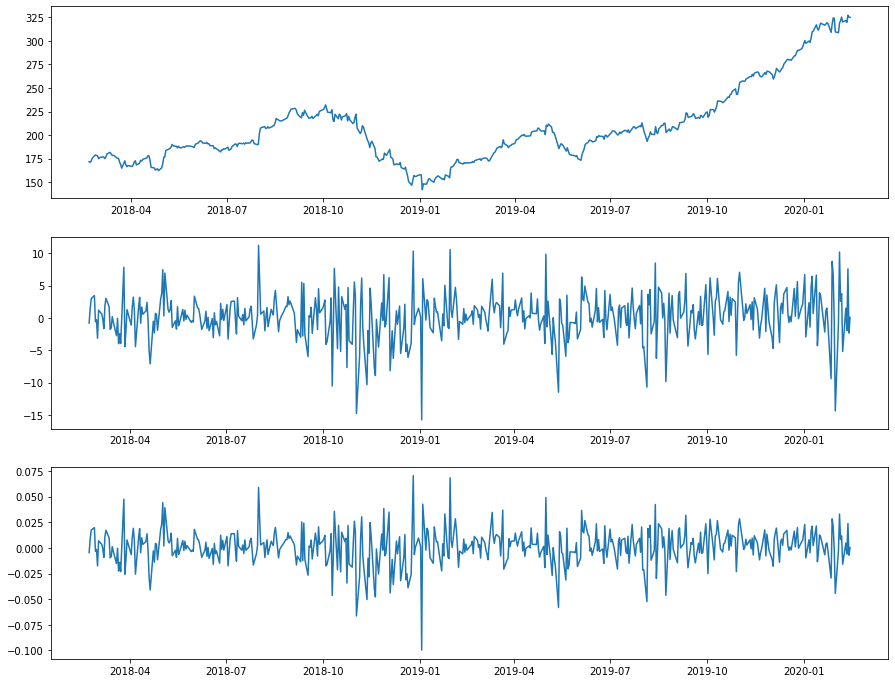

In [17]:
fig, axes = plt.subplots(nrows=3, figsize=(15,12))
axes[0].plot(df['Close'])
axes[1].plot(df['Close'].diff())
axes[2].plot(df['Close'].pct_change())

[Why would we difference?](https://otexts.com/fpp2/stationarity.html) Well, there is one assumption that is **required** for nearly every time series model: **stationarity**.
- If our time series is stationary, then we do not need to difference
- If our time series is not stationary, then we difference either once (`df.diff()`) or twice (`df.diff().diff()`). Differenced data often is stationary, so we difference our data, then model that!

## What is stationarity?
---

Informally, stationarity means that there **aren't systematic changes in our time series over time**.
- Our mean stays the same. (There is no trend.)
- The autocorrelation between $Y_t$ and $Y_{t-k}$ depends only on the size of our lag $k$. (There is no seasonality.)
- A [white noise process](https://stats.stackexchange.com/questions/7070/what-is-a-white-noise-process) is a common example of a stationary time series.

The problem is, many time series **aren't** stationary.
- The amount that stock prices vary on a day-to-day basis aren't going to be the same.
- Crop prices may increase or decrease over time; assuming a constant mean here doesn't make sense.


## Shifting
---

`df.shift()` is used to bring values from previous dates forward in time.

In [18]:
df.shift()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21,172.050003,174.259995,171.419998,171.850006,167.085480,33930500.0
2018-02-22,172.830002,174.119995,171.009995,171.070007,166.327103,37471600.0
2018-02-23,171.800003,173.949997,171.710007,172.500000,167.717453,30991900.0
2018-02-26,173.669998,175.649994,173.539993,175.500000,170.634277,33812400.0
...,...,...,...,...,...,...
2020-02-10,322.369995,323.399994,318.000000,320.029999,320.029999,29421000.0
2020-02-11,314.179993,321.549988,313.850006,321.549988,321.549988,27337200.0
2020-02-12,323.600006,323.899994,318.709991,319.609985,319.609985,23580800.0


## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

**NOTE:** Remember we want stationarity!

In [19]:
pd.concat([
    df[['Open']].pct_change(),
    df[['Close']].shift().rename(columns={'Close': 'Close_1'}).pct_change(),
    (df[['Close']].pct_change() >= 0).astype(int)
], axis=1).dropna()

,Open,Close_1,Close
Date,,,
2018-02-22,-0.005960,-0.004539,1
2018-02-23,0.010885,0.008359,1
2018-02-26,0.015432,0.017391,1
2018-02-27,0.015594,0.019772,0
2018-02-28,0.000893,-0.003241,0
...,...,...,...
2020-02-10,-0.025406,-0.015928,1
2020-02-11,0.029983,0.004750,0
2020-02-12,-0.006582,-0.006033,1
